In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn import metrics

In [2]:
# Load in merged datasets
merged_all = pd.read_csv("C:\\Users\\joyce\\OSMI\\modified_merged_all.csv")
merged_no2014 = pd.read_csv("C:\\Users\\joyce\\OSMI\\modified_merged_no2014.csv")

In [3]:
# Define a function that outputs many modeling performance metrics
def model_evaluation(test_y, pred, probs):
    # Testing Accuracy
    accuracy = metrics.accuracy_score(test_y, pred)
    print("Testing Accuracy:", accuracy)
    # Recall/Sensitivity
    recall = metrics.recall_score(test_y, pred)
    print("Recall:", recall)
    # Confusion Matrix
    confus_matrix = metrics.confusion_matrix(test_y, pred)
    sns.heatmap(confus_matrix,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("TP:", confus_matrix[1, 1])
    print("TN:", confus_matrix[0, 0])
    print("FP:", confus_matrix[0, 1])
    print("FN:", confus_matrix[1, 0])
    # ROC curve
    # Keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # Get the false positive rates, true positive rates, and thresholds
    fpr, tpr, threshold = metrics.roc_curve(test_y, probs)
    # Get the AUC score
    auc = metrics.roc_auc_score(test_y, probs)
    # Citation for this code: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    # Plot the ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.3f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    

In [4]:
# Defined a function for each model to fit the models, print out the training score, and output applicable feature importance plots
# Citation: Scikit-learn - https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
# Logistic Regression
def logistic(train_x, train_y, test_x, reg_type):
    feature_names = train_x.columns.values.tolist()
    feature_names = np.array(feature_names)
    # Instantiate
    lr = LogisticRegression(penalty = reg_type, solver = 'saga')
    # Fit
    lr.fit(train_x, train_y)
    # Plot Logistic Regression Feature Importance (only top 10)
    sorted_idx = abs(lr.coef_[0]).argsort()
    plt.barh(feature_names[sorted_idx][-10:], abs(lr.coef_[0][sorted_idx][-10:]))
    plt.show()
    # Predictions on the test dataset
    lr_predicted = pd.DataFrame(lr.predict(test_x))
    lr_probs = lr.predict_proba(test_x)
    # Training Accuracy
    score_tr = lr.score(train_x, train_y)
    print("Training Accuracy:",score_tr)
    return lr_predicted, lr_probs

# Random Forest
def rf(train_x, train_y, test_x):
    feature_names = train_x.columns.values.tolist()
    feature_names = np.array(feature_names)
    # Instantiate
    rf = RandomForestClassifier(random_state=2)
    # Fit
    rf.fit(train_x, train_y)
    # Plot Random Forest Feature Importance (only top 10)
    sorted_idx = rf.feature_importances_.argsort()
    plt.barh(feature_names[sorted_idx][-10:], rf.feature_importances_[sorted_idx][-10:])
    plt.show()
    # Predictions on the test dataset
    rf_predicted = pd.DataFrame(rf.predict(test_x))
    rf_probs = rf.predict_proba(test_x)
    # Training Accuracy
    score_tr = rf.score(train_x, train_y)
    print("Training Accuracy:",score_tr)
    return rf_predicted, rf_probs

# Decision Tree
def dtree(train_x, train_y, test_x, max_dep):
    feature_names = train_x.columns.values.tolist()
    feature_names = np.array(feature_names)
    # Instantiate
    d_tree = tree.DecisionTreeClassifier(max_depth = max_dep)
    # Fit
    d_tree.fit(train_x, train_y)
    # Plot Decision Tree Feature Importance (only top 10)
    sorted_idx = d_tree.feature_importances_.argsort()
    plt.barh(feature_names[sorted_idx][-10:], d_tree.feature_importances_[sorted_idx][-10:])
    plt.show()
    # Predictions on the test dataset
    tree_predicted = pd.DataFrame(d_tree.predict(test_x))
    tree_probs = d_tree.predict_proba(test_x)
    # Training Accuracy
    score_tr = d_tree.score(train_x, train_y)
    print("Training Accuracy:",score_tr)
    # Get Decision Tree plot
#     tree.plot_tree(d_tree, filled=True)
#     plt.show()
    return tree_predicted, tree_probs

# SVM
def SVM(train_x, train_y, test_x, kernel_type):
    # Instantiate
    svm = SVC(probability=True, kernel=kernel_type)
    # Fit
    svm = svm.fit(train_x, train_y)
    # Predictions on the test dataset
    svm_predicted = pd.DataFrame(svm.predict(test_x))
    svm_probs = svm.predict_proba(test_x)
    # Training Accuracy
    score_tr = svm.score(train_x, train_y)
    print("Training Accuracy:",score_tr)
    return svm_predicted, svm_probs

# Bayes
def bayes(train_x, train_y, test_x):
    # Instantiate
    bayes = BernoulliNB()
    # Fit
    bayes.fit(train_x, train_y)
    # Predictions on the test dataset
    bayes_predicted = pd.DataFrame(bayes.predict(test_x))
    bayes_probs = bayes.predict_proba(test_x)
    # Training Accuracy
    score_tr = bayes.score(train_x, train_y)
    print("Training Accuracy:",score_tr)
    return bayes_predicted, bayes_probs

# KNN
def knn(train_x, train_y, test_x, neighbors):
    # Instantiate
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    # Fit 
    knn.fit(train_x, train_y)
    # Predictions on the test dataset
    knn_predicted = pd.DataFrame(knn.predict(test_x))
    knn_probs = knn.predict_proba(test_x)
    # Training Accuracy
    score_tr = knn.score(train_x, train_y)
    print("Training Accuracy:",score_tr)
    return knn_predicted, knn_probs

In [5]:
# Citation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
# Function that converts a list of variables to dummy variables
def make_dummies(list_dums, df):
     # Generate binary values using get_dummies
    dum_df = pd.get_dummies(df, columns=list_dums, prefix=list_dums, drop_first=True)
    return dum_df

**Predict on 2014-2019, one-hot encoding and label encoding**

In [6]:
# Define variables that need to be one-hot encoded
var_dums = ["gender", "family_history", "benefits", "care_options", "wellness_program",
            "seek_help", "anonymity", "supervisor", "coworkers", "mental_health_interview", "phys_health_interview"]
# One-hot encode variables
merged_all_dums = make_dummies(var_dums, merged_all)
merged_all_dums

,year,country_label,age,age_range,no_employees,leave,treatment,gender_1,gender_2,family_history_1,...,anonymity_1,anonymity_2,supervisor_1,supervisor_2,coworkers_1,coworkers_2,mental_health_interview_1,mental_health_interview_2,phys_health_interview_1,phys_health_interview_2
0,2014,1,29,1,3,2,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
1,2014,1,46,2,2,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,2014,1,41,2,5,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2014,1,33,2,2,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
4,2014,1,35,2,5,5,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
5,2014,1,33,2,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,2014,1,35,2,1,0,1,1,0,0,...,0,0,0,1,0,1,1,0,1,0
7,2014,1,34,2,2,2,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,2014,0,37,2,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
9,2014,0,32,2,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [7]:
# 70/30 test-train split and define target and predictors
merged_all_dums_train, merged_all_dums_test = train_test_split(merged_all_dums, test_size = 0.3, random_state = 5)
merged_all_dums_y_train = merged_all_dums_train['treatment'].astype('category')
merged_all_dums_x_train = merged_all_dums_train.drop(['country_label','treatment','year', 'age'], axis=1)
merged_all_dums_y_test = merged_all_dums_test['treatment'].astype('category')
merged_all_dums_x_test = merged_all_dums_test.drop(['country_label','treatment','year', 'age'], axis=1)

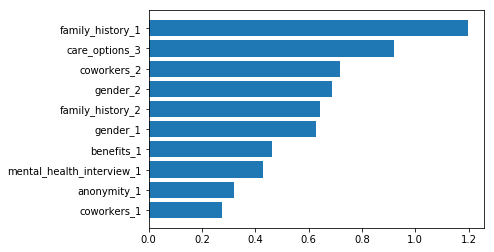

Training Accuracy: 0.7327800829875518
Testing Accuracy: 0.7105517909002904
Recall: 0.7818181818181819


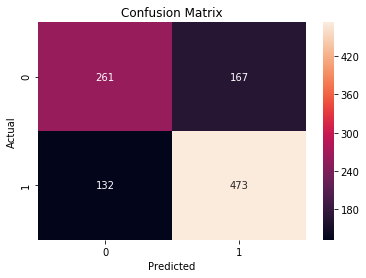

TP: 473
TN: 261
FP: 167
FN: 132


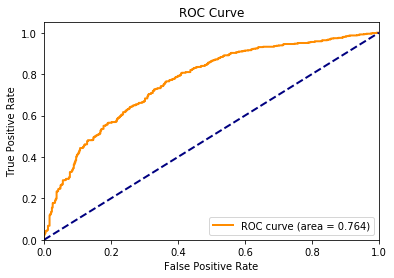

In [8]:
# Logistic Regression
lr_predicted, lr_probs = logistic(merged_all_dums_x_train, merged_all_dums_y_train, merged_all_dums_x_test, 'l1')
model_evaluation(merged_all_dums_y_test, lr_predicted, lr_probs)

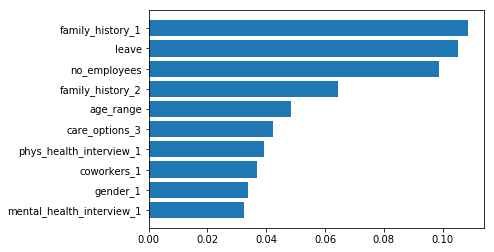

Training Accuracy: 0.9954356846473029
Testing Accuracy: 0.7028073572120038
Recall: 0.771900826446281


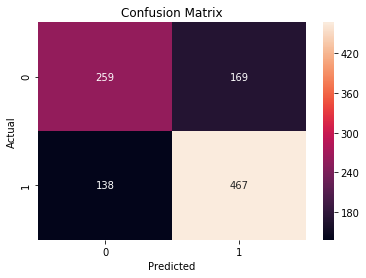

TP: 467
TN: 259
FP: 169
FN: 138


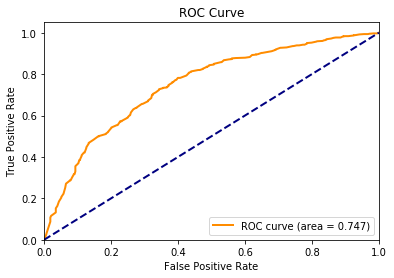

In [9]:
# Random Forest
rf_predicted, rf_probs = rf(merged_all_dums_x_train, merged_all_dums_y_train, merged_all_dums_x_test)
model_evaluation(merged_all_dums_y_test, rf_predicted, rf_probs)

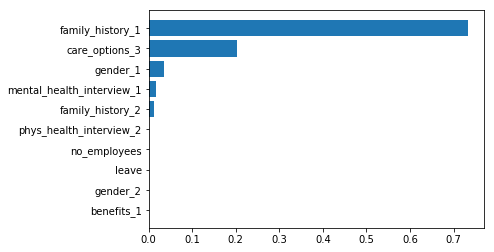

Training Accuracy: 0.7302904564315352
Testing Accuracy: 0.712487899322362
Recall: 0.8479338842975207


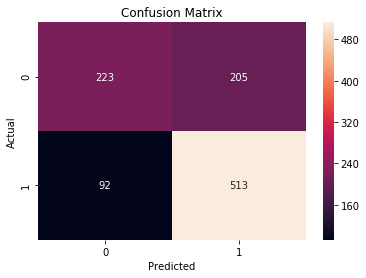

TP: 513
TN: 223
FP: 205
FN: 92


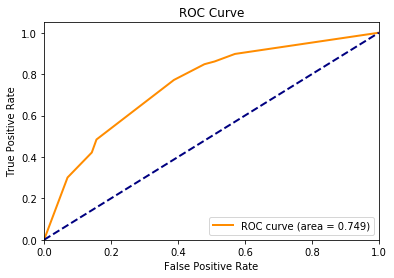

In [10]:
# Decision Tree
tree_predicted, tree_probs = dtree(merged_all_dums_x_train, merged_all_dums_y_train, merged_all_dums_x_test, 3)
model_evaluation(merged_all_dums_y_test, tree_predicted, tree_probs)

Training Accuracy: 0.7211618257261411
Testing Accuracy: 0.691190706679574
Recall: 0.7669421487603306


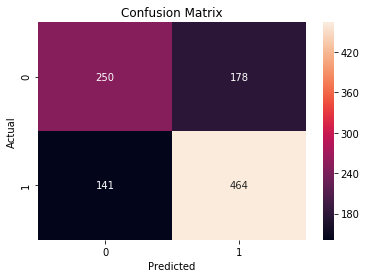

TP: 464
TN: 250
FP: 178
FN: 141


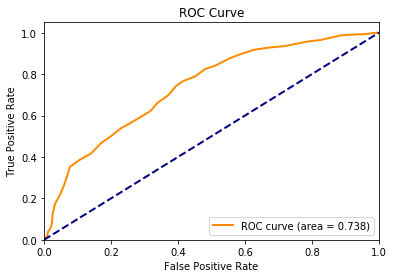

In [11]:
# KNN w/ 47 neighbors
knn_predicted, knn_probs = knn(merged_all_dums_x_train, merged_all_dums_y_train, merged_all_dums_x_test, 47)
model_evaluation(merged_all_dums_y_test, knn_predicted, knn_probs)

Training Accuracy: 0.7128630705394191
Testing Accuracy: 0.691190706679574
Recall: 0.7454545454545455


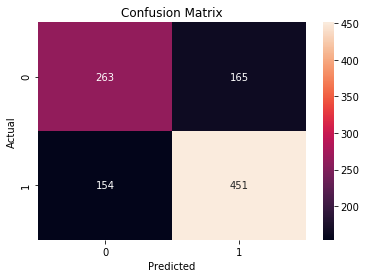

TP: 451
TN: 263
FP: 165
FN: 154


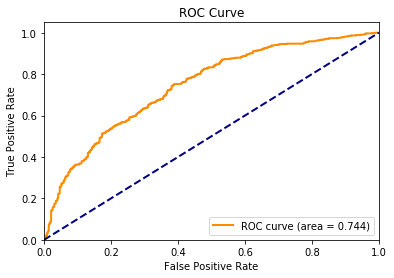

In [12]:
# Naive Bayes
bayes_predicted, bayes_probs = bayes(merged_all_dums_x_train, merged_all_dums_y_train, merged_all_dums_x_test)
model_evaluation(merged_all_dums_y_test, bayes_predicted, bayes_probs)

Training Accuracy: 0.754356846473029
Testing Accuracy: 0.7163601161665053
Recall: 0.8231404958677686


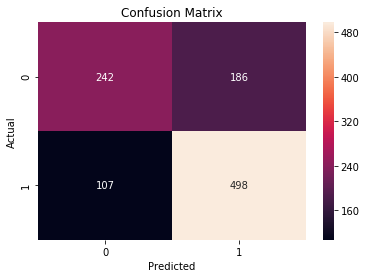

TP: 498
TN: 242
FP: 186
FN: 107


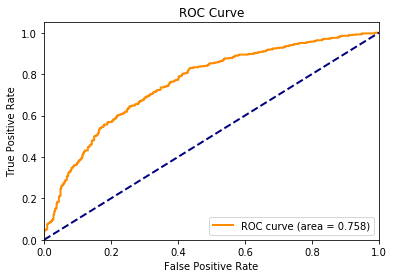

In [13]:
# SVM with poly kernel
svm_predicted, svm_probs = SVM(merged_all_dums_x_train, merged_all_dums_y_train, merged_all_dums_x_test, 'poly')
model_evaluation(merged_all_dums_y_test, svm_predicted, svm_probs)

**Predict on 2014-2019, all label encoded (did this as a test)**

In [14]:
# 70/30 test-train split and define target and predictors
merged_all_train, merged_all_test = train_test_split(merged_all, test_size = 0.3, random_state = 5)
merged_all_y_train = merged_all_train['treatment'].astype('category')
merged_all_x_train = merged_all_train.drop(['treatment','year', 'age', 'country_label'], axis=1)
merged_all_y_test = merged_all_test['treatment'].astype('category')
merged_all_x_test = merged_all_test.drop(['treatment','year', 'age', 'country_label'], axis=1)

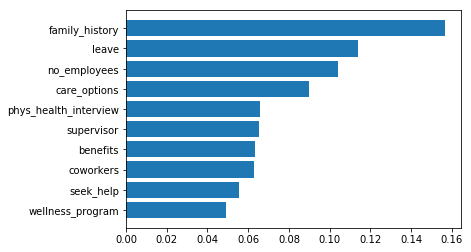

Training Accuracy: 0.9954356846473029
Testing Accuracy: 0.68054211035818
Recall: 0.7487603305785124


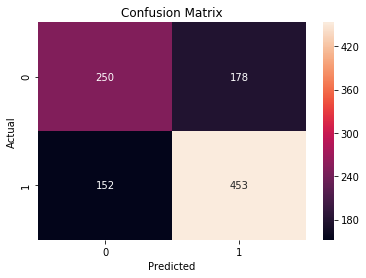

TP: 453
TN: 250
FP: 178
FN: 152


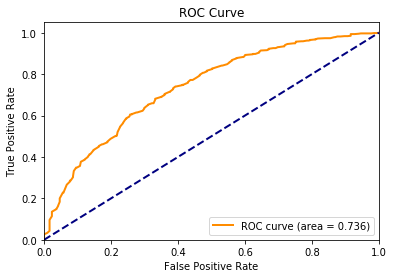

In [15]:
# Random Forest
rf_predicted, rf_probs = rf(merged_all_x_train, merged_all_y_train, merged_all_x_test)
model_evaluation(merged_all_y_test, rf_predicted, rf_probs)

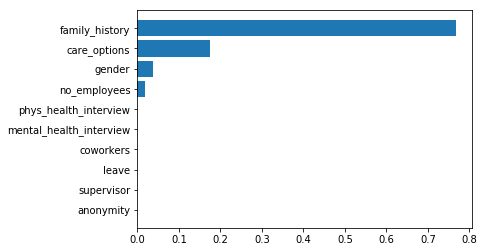

Training Accuracy: 0.7236514522821577
Testing Accuracy: 0.707647628267183
Recall: 0.8611570247933884


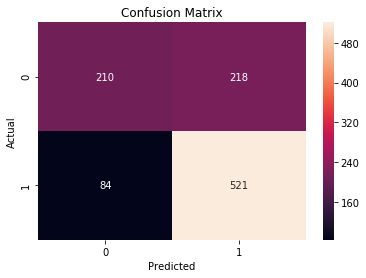

TP: 521
TN: 210
FP: 218
FN: 84


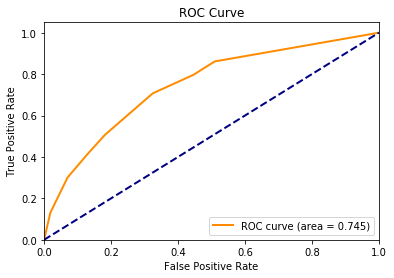

In [16]:
# Decision Tree
tree_predicted, tree_probs = dtree(merged_all_x_train, merged_all_y_train, merged_all_x_test, 3)
model_evaluation(merged_all_y_test, tree_predicted, tree_probs)

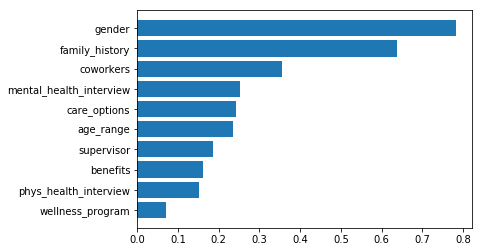

Training Accuracy: 0.670954356846473
Testing Accuracy: 0.6698935140367861
Recall: 0.7735537190082644


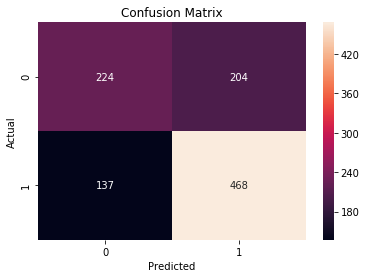

TP: 468
TN: 224
FP: 204
FN: 137


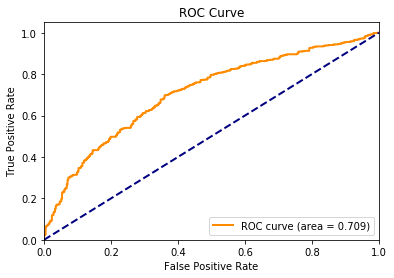

In [17]:
# Logistic Regression
lr_predicted, lr_probs = logistic(merged_all_x_train, merged_all_y_train, merged_all_x_test, 'l2')
model_evaluation(merged_all_y_test, lr_predicted, lr_probs)

Training Accuracy: 0.678838174273859
Testing Accuracy: 0.6495643756050339
Recall: 0.7041322314049587


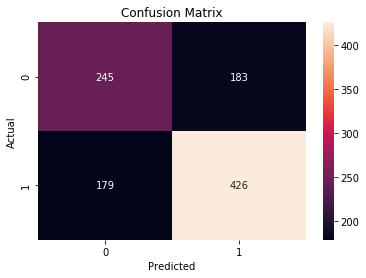

TP: 426
TN: 245
FP: 183
FN: 179


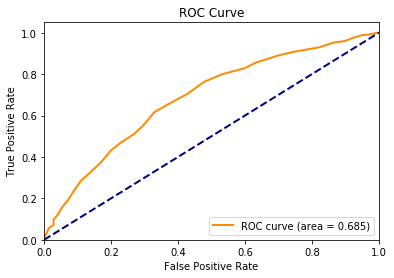

In [18]:
# KNN w/ 47 neighbors
knn_predicted, knn_probs = knn(merged_all_x_train, merged_all_y_train, merged_all_x_test, 47)
model_evaluation(merged_all_y_test, knn_predicted, knn_probs)

Training Accuracy: 0.629460580912863
Testing Accuracy: 0.6505324298160697
Recall: 0.8033057851239669


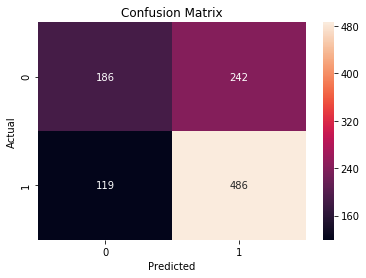

TP: 486
TN: 186
FP: 242
FN: 119


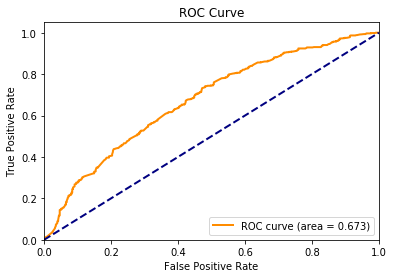

In [19]:
# Naive Bayes
bayes_predicted, bayes_probs = bayes(merged_all_x_train, merged_all_y_train, merged_all_x_test)
model_evaluation(merged_all_y_test, bayes_predicted, bayes_probs)

**Predict 2016-2019, label encoded and one-hot encoded**

In [20]:
# One-hot encode applicable variables
merged_no2014_dums = make_dummies(var_dums, merged_no2014)
# Convert "Maybe" responses into "Yes" responses for current_mental_disorder
merged_no2014_dums["current_mental_disorder"]=merged_no2014_dums["current_mental_disorder"].replace({2: 1})
# 70/30 test-train split and define target and predictors
merged_no2014_dums_train, merged_no2014_dums_test = train_test_split(merged_no2014_dums, test_size = 0.3, random_state = 5)
merged_no2014_dums_y_train = merged_no2014_dums_train["current_mental_disorder"].astype('category')
merged_no2014_dums_x_train = merged_no2014_dums_train.drop(['treatment','current_mental_disorder','diagnosed','year', 'age', 
                                                  'work_interfere_effective', 'work_interfere_ineffective', 'country_label'], axis=1)
merged_no2014_dums_y_test = merged_no2014_dums_test['current_mental_disorder'].astype('category')
merged_no2014_dums_x_test = merged_no2014_dums_test.drop(['treatment','current_mental_disorder','diagnosed','year', 'age',  
                                                'work_interfere_effective', 'work_interfere_ineffective', 'country_label'], axis=1)

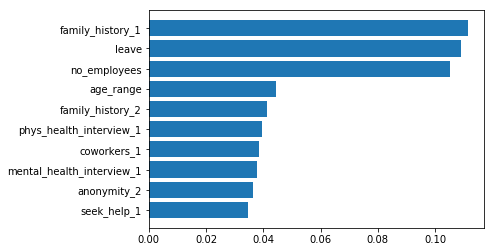

Training Accuracy: 0.9993917274939172
Testing Accuracy: 0.7276595744680852
Recall: 0.8568329718004338


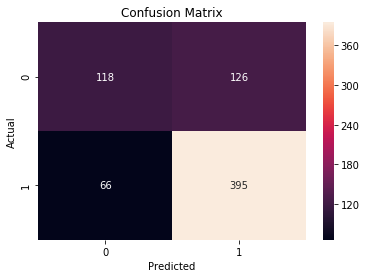

TP: 395
TN: 118
FP: 126
FN: 66


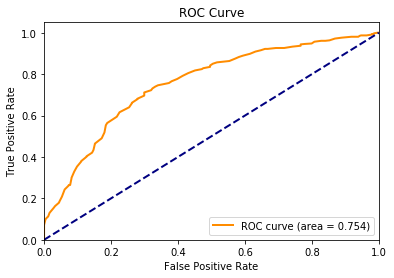

In [21]:
# Random Forest
rf_predicted, rf_probs = rf(merged_no2014_dums_x_train, merged_no2014_dums_y_train, merged_no2014_dums_x_test)
model_evaluation(merged_no2014_dums_y_test, rf_predicted, rf_probs)

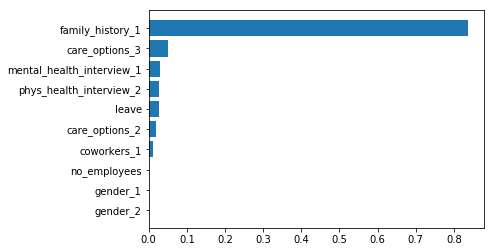

Training Accuracy: 0.7341849148418491
Testing Accuracy: 0.7205673758865249
Recall: 0.8698481561822126


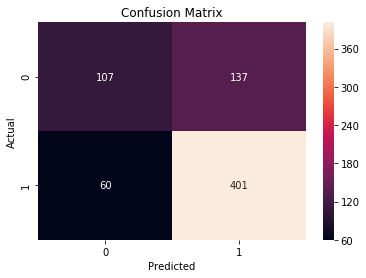

TP: 401
TN: 107
FP: 137
FN: 60


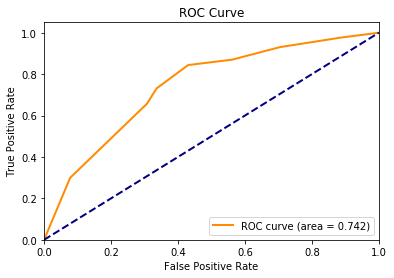

In [22]:
# Decision Tree
tree_predicted, tree_probs = dtree(merged_no2014_dums_x_train, merged_no2014_dums_y_train, merged_no2014_dums_x_test, 3)
model_evaluation(merged_no2014_dums_y_test, tree_predicted, tree_probs)

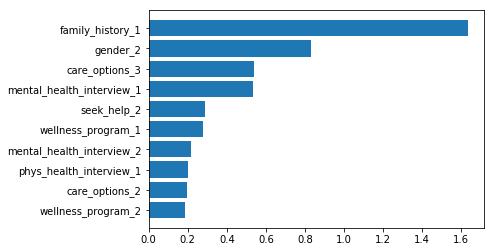

Training Accuracy: 0.7396593673965937
Testing Accuracy: 0.750354609929078
Recall: 0.8611713665943601


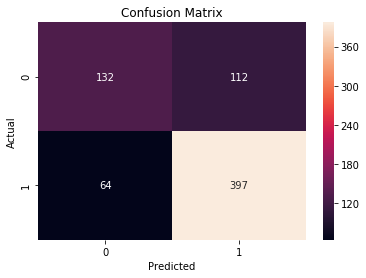

TP: 397
TN: 132
FP: 112
FN: 64


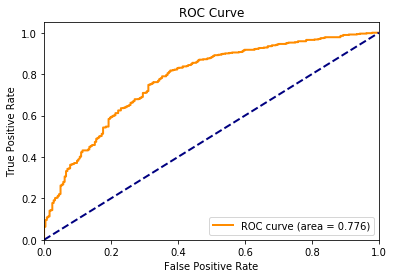

In [23]:
# Logistic Regression
lr_predicted, lr_probs = logistic(merged_no2014_dums_x_train, merged_no2014_dums_y_train, merged_no2014_dums_x_test, 'l1')
model_evaluation(merged_no2014_dums_y_test, lr_predicted, lr_probs)

Training Accuracy: 0.7226277372262774
Testing Accuracy: 0.7375886524822695
Recall: 0.8177874186550976


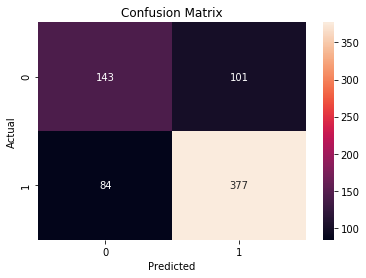

TP: 377
TN: 143
FP: 101
FN: 84


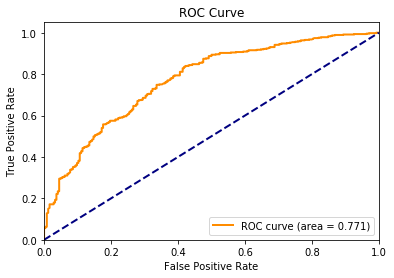

In [24]:
# Naive Bayes
bayes_predicted, bayes_probs = bayes(merged_no2014_dums_x_train, merged_no2014_dums_y_train, merged_no2014_dums_x_test)
model_evaluation(merged_no2014_dums_y_test, bayes_predicted, bayes_probs)

Training Accuracy: 0.7341849148418491
Testing Accuracy: 0.7262411347517731
Recall: 0.9002169197396963


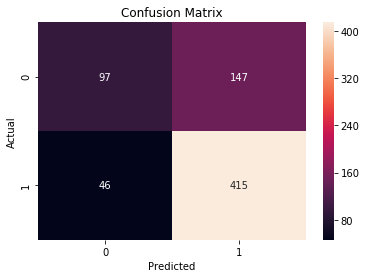

TP: 415
TN: 97
FP: 147
FN: 46


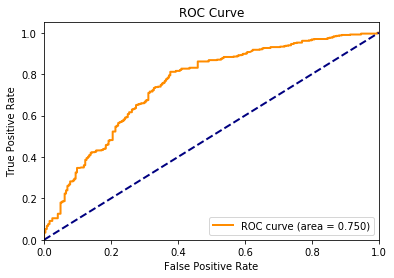

In [25]:
# SVM with poly kernel
svm_predicted, svm_probs = SVM(merged_no2014_dums_x_train, merged_no2014_dums_y_train, merged_no2014_dums_x_test, "poly")
model_evaluation(merged_no2014_dums_y_test, svm_predicted, svm_probs)

Training Accuracy: 0.7116788321167883
Testing Accuracy: 0.7120567375886525
Recall: 0.9436008676789588


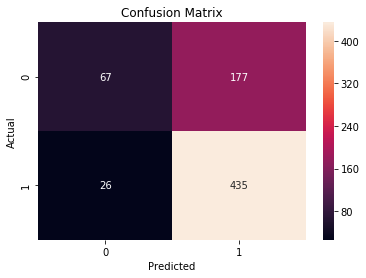

TP: 435
TN: 67
FP: 177
FN: 26


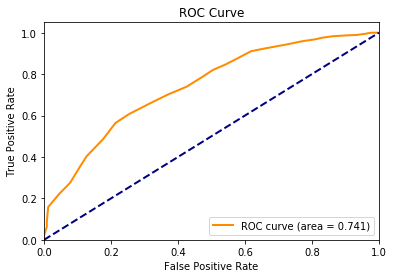

In [26]:
# KNN w/ 51 neighbors
knn_predicted, knn_probs = knn(merged_no2014_dums_x_train, merged_no2014_dums_y_train, merged_no2014_dums_x_test, 51)
model_evaluation(merged_no2014_dums_y_test, knn_predicted, knn_probs)